In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Basic Operations example using TensorFlow library.

In [4]:
# %% tf.Graph represents a collection of tf.Operations
# You can create operations by writing out equations.
# By default, there is a graph: tf.get_default_graph()
# and any new operations are added to this graph.
# The result of a tf.Operation is a tf.Tensor, which holds
# the values

In [5]:
# %% First a tf.Tensor
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

In [7]:
# %% Construct a tf.Session to execute the graph.
sess = tf.Session()
result = sess.run(x)
print(result)

[-3.         -2.80645156 -2.61290312 -2.41935492 -2.22580647 -2.03225803
 -1.83870971 -1.64516139 -1.45161295 -1.25806451 -1.06451619 -0.87096786
 -0.67741942 -0.48387098 -0.29032278 -0.09677434  0.0967741   0.29032254
  0.48387098  0.67741919  0.87096763  1.06451607  1.25806427  1.45161295
  1.64516115  1.83870935  2.03225803  2.22580624  2.41935444  2.61290312
  2.80645132  3.        ]


In [9]:
# %% Alternatively pass a session to the eval fn:
x.eval(session=sess)
# x.eval() does not work, as it requires a session!

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [10]:
# %% We can setup an interactive session if we don't
# want to keep passing the session around:
sess.close()
sess = tf.InteractiveSession()

In [11]:
# %% Now this will work!
x.eval()

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [12]:
# %% Now a tf.Operation
# We'll use our values from [-3, 3] to create a Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [15]:
# %% By default, new operations are added to the default Graph
assert z.graph is tf.get_default_graph()

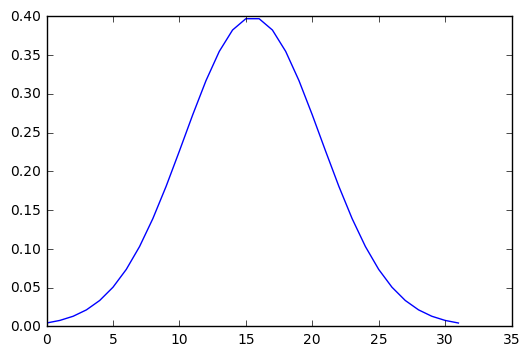

In [19]:
# %% Execute the graph and plot the result
plt.plot(z.eval())

In [20]:
# %% We can find out the shape of a tensor like so:
print(z.get_shape())

(32,)


In [21]:
# %% Or in a more friendly format
print(z.get_shape().as_list())

[32]


In [22]:
# %% Sometimes we may not know the shape of a tensor
# until it is computed in the graph.  In that case
# we should use the tf.shape fn, which will return a
# Tensor which can be eval'ed, rather than a discrete
# value of tf.Dimension
print(tf.shape(z).eval())

[32]


In [23]:
# %% We can combine tensors like so:
print(tf.pack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [3]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

In [8]:
# Launch the default graph.
with tf.Session() as sess:
    print ('a=2 --> a=%i'%a.eval())
    print('b=3 --> b=%i'%b.eval())
    print ("Addition with constants: %i" % sess.run(a+b))
    print ("Multiplication with constants: %i" % sess.run(a*b))

a=2 --> a=2
b=3 --> b=3
Addition with constants: 5
Multiplication with constants: 6


In [9]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [10]:
# Define some operations
add = tf.add(a, b)
mul = tf.mul(a, b)

In [12]:
# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print ("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print ("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [13]:
# ----------------
# More in details:
# Matrix Multiplication from TensorFlow official tutorial

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

In [14]:
print(matrix1)

Tensor("Const_2:0", shape=(1, 2), dtype=float32)


In [15]:
# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

In [16]:
# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

In [18]:
# The output of the op is returned in 'result' as a numpy `ndarray` object.
with tf.Session() as sess:
    result = sess.run(product)
    print (result)

[[ 12.]]


In [24]:
# %% Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

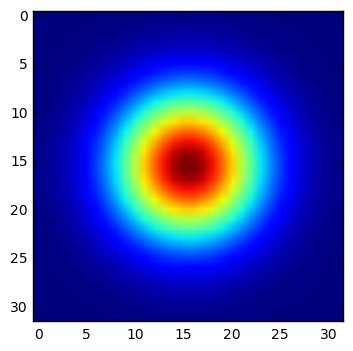

In [25]:
# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())